# 04ISFOV - COMPUTER VISION 

## Introduzione a OpenCV 

_Lo scopo di questa esercitazione è quello di familiarizzare con OpenCV in Python, apprendendo l’utilizzo di alcune funzioni fondamentali delle librerie stesse. Come ulteriore aiuto, potete utilizzare i link utili riportati al termine di questo Notebook._

### ESERCIZIO 1: OPERAZIONI DI BASE

_Partendo dai progetti già condivisi o creandone uno nuovo, realizzate un programma che permetta di eseguire alcune operazioni basilari sulle immagini. In particolare:_

   1. Caricare un'immagine a colori (propria o con licenza Creative Commons) 
   2. Stampare a schermo alcuni pixel dell’immagine (a scelta) 
   3. Cambiare la scala di colori dell’immagine a RGB, visualizzarla e ristampare gli stessi pixel di prima. Confrontando            i valori stampati in precedenza con quelli attuali, cosa si può notare?

## Pacchetti da importare

In [9]:
%matplotlib inline
%pylab inline 
from ipywidgets import interact
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import clear_output

Populating the interactive namespace from numpy and matplotlib


## Lettura e conversione dell'immagine

In [1]:
img = cv.imread("images/dog.jpeg")
#img in RGB
imgrgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
#Per aumentare la grandezza dei plot
plt.rcParams['figure.figsize'] = (10,6)

NameError: name 'cv' is not defined

## Resto del codice

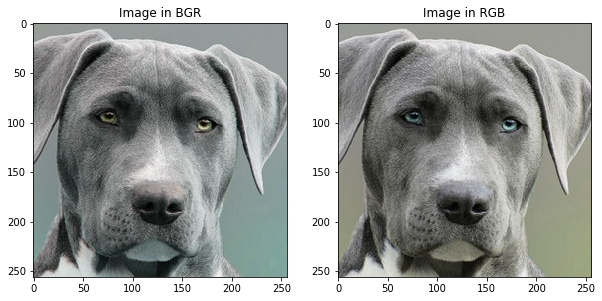

Pixels in BGR:
[40 45 44] [21 31 31] [150 156 155]
Pixels in RGB:
[44 45 40] [31 31 21] [155 156 150]


In [11]:
px = img[100, 100]
px1 = img[234, 67]
px2 = img[13, 112]
px3 = imgrgb[100, 100]
px4 = imgrgb[234, 67]
px5 = imgrgb[13, 112]


plt.subplot(1,2,1)
plt.imshow(img)
plt.title("Image in BGR")

plt.subplot(1,2,2)
plt.imshow(imgrgb)
plt.title("Image in RGB")
plt.show()

print("Pixels in BGR:")
print(px, px1, px2)

print("Pixels in RGB:")
print(px3, px4, px5)

   ### Ultimi due punti:
   4. Rimpiazzare ora un canale con una matrice di zeri. Qual è l’effetto macroscopico?
   5. Rimpiazzare, infine, lo stesso canale di prima con una matrice i cui valori sono a 255. 
       Qual è l’effetto macroscopico?

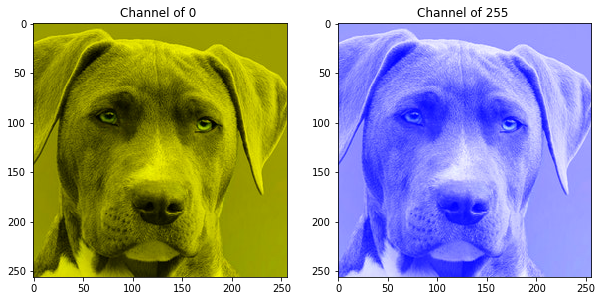

In [12]:
imgy = np.copy(imgrgb)
imgy[:, :, 2] = 0
plt.subplot(1,2,1)
plt.imshow(imgy)
plt.title("Channel of 0 ")

imgz = np.copy(imgrgb)
imgz[:, :, 2] = 255
plt.subplot(1,2,2)
plt.imshow(imgz)
plt.title("Channel of 255 ")

plt.show()


### ESERCIZIO 2: OPERAZIONI ARITMETICHE

Partendo dai progetti già condivisi o creandone uno nuovo, realizzate un programma che permetta di eseguire alcune operazioni aritmetiche tra immagini. 

In particolare, mostrare a schermo il flusso video ottenuto dalla webcam o da un video scaricato sul computer (possibilmente con licenza Creative Commons). 

Scelta poi un’immagine (“logo”) le cui dimensioni siano inferiori al frame video, applicatela nell’angolo in basso a destra di ogni frame del video. Per far ciò, impostate un ROI (Region Of Interest) sui frame del video e poi “sommate” il logo all’area così delineata. 

Utilizzate tre meccanismi di “somma”: l’addition, il blending e l’intera sostituzione dei pixel dell’area con il logo. Ci sono differenze nel risultato? 

#### Catturiamo il flusso video della webcam e scegliamo il meccanismo di somma

In [5]:
# Grab the input device, in this case the webcam
# You can also give path to the video file
vid = cv.VideoCapture(0)
print("Choose 0 for the addition,1 for the blending")
case = input()

Choose 0 for the addition,1 for the blending
0


#### Carichiamo il logo da visualizzare e salviamoci la sua grandezza
Premere due volte "i" da tastiera per interrompere il kernel e così il flusso video.

In [6]:
logo = cv.imread("images/opcv.png")
logo = cv.cvtColor(logo, cv.COLOR_BGR2RGB)
xl, yl, cl = logo.shape

# Put the code in try-except statements
# Catch the keyboard exception and 
# release the camera device and 
# continue with the rest of code.
try:
    while(True):
        # Capture frame-by-frame
        ret, frame = vid.read()
        if not ret:
            # Release the Video Device if ret is false
            vid.release()
            # Message to be displayed after releasing the device
            print("Released Video Resource")
            break
        # Convert the image from OpenCV BGR format to matplotlib RGB format
        # to display the image
        x, y, c = frame.shape
        if case == "0":
            result = cv.add(frame[x - xl:x, y - yl:y], logo)

        elif case == "1":
            result = cv.addWeighted(frame[x - xl:x, y - yl:y], 1.0, logo, 0.8, 0.0)

        else:
            #print("else case")
            result = logo
        frame[x - xl:x, y - yl:y] = result
        frame = cv.cvtColor(frame, cv.COLOR_BGR2RGB)
        # Turn off the axis
        axis('off')
        # Title of the window
        title("Input Stream")
        # Display the frame
        imshow(frame)
        show()
        # Display the frame until new frame is available
        clear_output(wait=True)
except KeyboardInterrupt:
        # Release the Video Device
    vid.release()
        # Message to be displayed after releasing the device
    print("Released Video Resource")

Released Video Resource


### ESERCIZIO 3: ISTOGRAMMA E SUA EQUALIZZAZIONE

Partendo dai progetti già condivisi o creandone uno nuovo, realizzate un programma che permetta di calcolare, visualizzare e poi equalizzare l’istogramma di un’immagine. 
Per questo esercizio potete utilizzare un’immagine statica o agire direttamente su un flusso video. 

Iniziando con l’immagine/frame in scala di grigi, calcolate e visualizzate (in una finestra dedicata) l’istogramma dell’immagine tramite le funzioni messe a disposizione da OpenCV. Ripetete poi la stessa operazione con le funzioni messe a disposizione da Matplotlib. 

Calcolate e mostrate, successivamente, l’istogramma per ogni canale della versione a colori, utilizzando uno dei due modi sperimentati in precedenza. L’istogramma visualizzato vi sembra corretto e coerente rispetto a quello che potreste ottenere in GIMP o simili? 

Provvedete, infine, ad equalizzare l’istogramma dell’immagine e confrontarlo con l’istogramma originale. Vi aspettavate un risultato simile?

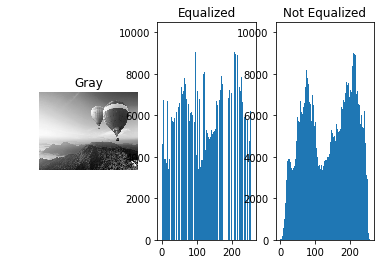

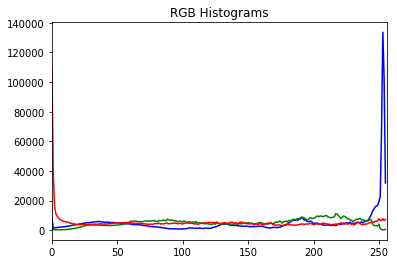

In [7]:
img = cv.imread("images/mongolfiere.jpg")
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
xgray = cv.equalizeHist(gray)

#histo = cv.calcHist([gray], [0], None, [256], [0, 256])
# x, y, c = img.shape

plt.subplot(1, 3, 1).axis('off')
plt.imshow(gray, 'gray')
plt.title("Gray")

plt.subplot(1, 3, 2)
# non è  necessario fare l'istogramma
plt.hist(xgray.ravel(), 256, [0, 256])
plt.title("Equalized")

# stampo non equalizzato
plt.subplot(1, 3, 3)
plt.hist(gray.ravel(), 256, [0, 256])
plt.title("Not Equalized")

plt.show()
""""
stampa istogramma per tutti i colori matplotlib
"""

color = ('b', 'g', 'r')

for i, col in enumerate(color):
  histr = cv.calcHist([img], [i], None, [256], [0, 256])
  plt.plot(histr, color = col)
  plt.xlim([0,256])

  plt.title("RGB Histograms")
    
plt.show()

### Link utili:

Operazioni di base sulle immagini: https://docs.opencv.org/3.4.3/d3/df2/tutorial_py_basic_ops.html<br/>
Operazioni aritmetiche sulle immagini: https://docs.opencv.org/3.4.3/d0/d86/tutorial_py_image_arithmetics.html<br/>
Visualizzazione di istogrammi: https://docs.opencv.org/3.4.3/d1/db7/tutorial_py_histogram_begins.html<br/>
Equalizzazione di istogrammi: https://docs.opencv.org/3.4.3/d5/daf/tutorial_py_histogram_equalization.html<br/>
Documentazione OpenCV in Python: https://madebyollin.github.io/opencv-python-docs/ 